In [94]:
import numpy  as np
import pandas as pd

import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer

from sklearn.model_selection import KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import seaborn as sns

import missingno as msno

## 분류모델외 성능평가
- 정확도 : 실 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표
- 문제점 : 이진분류의 경우 모델의 성능을 왜곡할 수 있다.
- 왜 : 데이터의 불균형
- 해결책 : F1 score(precision. Recall)

##분류모델 성능평가를 위한 이해

In [14]:
print('TP(target = 1, predict = 1)')
print('TN(target = 0, predict = 0)')
print('FN(target = 1, predict = 0) -> type 1 error(1종 오류)')
print('FP(target = 0, predict = 1) -> type 2 error')

target = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
prediction = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

tp = tn = fn = fp = 0
for idx in range(len(target)):
    print(idx)

TP(target = 1, predict = 1)
TN(target = 0, predict = 0)
FN(target = 1, predict = 0) -> type 1 error(1종 오류)
FP(target = 0, predict = 1) -> type 2 error
0
1
2
3
4
5
6
7
8
9


In [19]:
print('accurancy -', accuracy_score(target, prediction))
print('recall - ', recall_score(target, prediction))
print('precision - ', precision_score(target,prediction))
print('fr_score - ', f1_score(target, prediction))
print()
print('confusion_matrix - \n', confusion_matrix(target,prediction))

accurancy - 0.3
recall -  0.42857142857142855
precision -  0.5
fr_score -  0.4615384615384615

confusion_matrix - 
 [[0 3]
 [4 3]]


- 정밀도(Precision) : TP / (FP + TP)
- 상대적으로 정밀도가 더 중요한 지표인 경우의 모델? - 스팸메일
- 재현율(Recall) : TP / (FN + TP)
- 상대적으로 정밀도가 더 중요한 지표인 경우의 모델? - 의학(암진단), 금융(사기판단)

In [38]:
titanic_frm = pd.read_csv('C:/Users/JYP/data/titanic_train.csv')
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic_frm['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [40]:
print('2. target, feature로 데이터 분리')
titanic_target = titanic_frm['Survived']
titanic_feature = titanic_frm.drop(['Survived'], axis=1)

print('target type - ', type(titanic_target))
print('feature type - ', type(titanic_feature))

2. target, feature로 데이터 분리
target type -  <class 'pandas.core.series.Series'>
feature type -  <class 'pandas.core.frame.DataFrame'>


In [41]:
titanic_target.values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [42]:
titanic_feature

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
print('3. 전처리 요구사항 - ')
print('불필요한 feature 제거 - PassengerId, Name, Ticket')
print('결측값 처리 - Age는 평균, cabin는 N, Emparked는 N')
print('레이블 인코딩 - Cabin, Embarked')


# titanic_feature = titanic_feature.drop(['PassengerId'], axis=1)
# titanic_feature = titanic_feature.drop(['Name'], axis=1)
# titanic_feature = titanic_feature.drop(['Ticket'], axis=1)

titanic_feature = titanic_feature.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

3. 전처리 요구사항 - 
불필요한 feature 제거 - PassengerId, Name, Ticket
결측값 처리 - Age는 평균, cabin는 N, Emparked는 N
레이블 인코딩 - Cabin, Embarked


In [62]:
titanic_feature['Age']=titanic_feature['Age'].fillna(titanic_feature['Age'].mean())

In [54]:
titanic_feature['Cabin'].fillna('N')
titanic_feature['Cabin'] = titanic_feature['Cabin'].str[0]
titanic_feature['Embarked'].fillna('N')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [55]:
encoder = LabelEncoder()
titanic_feature['Sex'] = encoder.fit_transform(titanic_feature['Sex'])
titanic_feature['Cabin'] = encoder.fit_transform(titanic_feature['Cabin'])
titanic_feature['Embarked'] = encoder.fit_transform(titanic_feature['Embarked'])

In [56]:
titanic_feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,8,2
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,8,2
3,1,0,35.0,1,0,53.1000,2,2
4,3,1,35.0,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,8,2
887,1,0,19.0,0,0,30.0000,1,2
888,3,0,NaN,1,2,23.4500,8,2
889,1,1,26.0,0,0,30.0000,2,0


<AxesSubplot:>

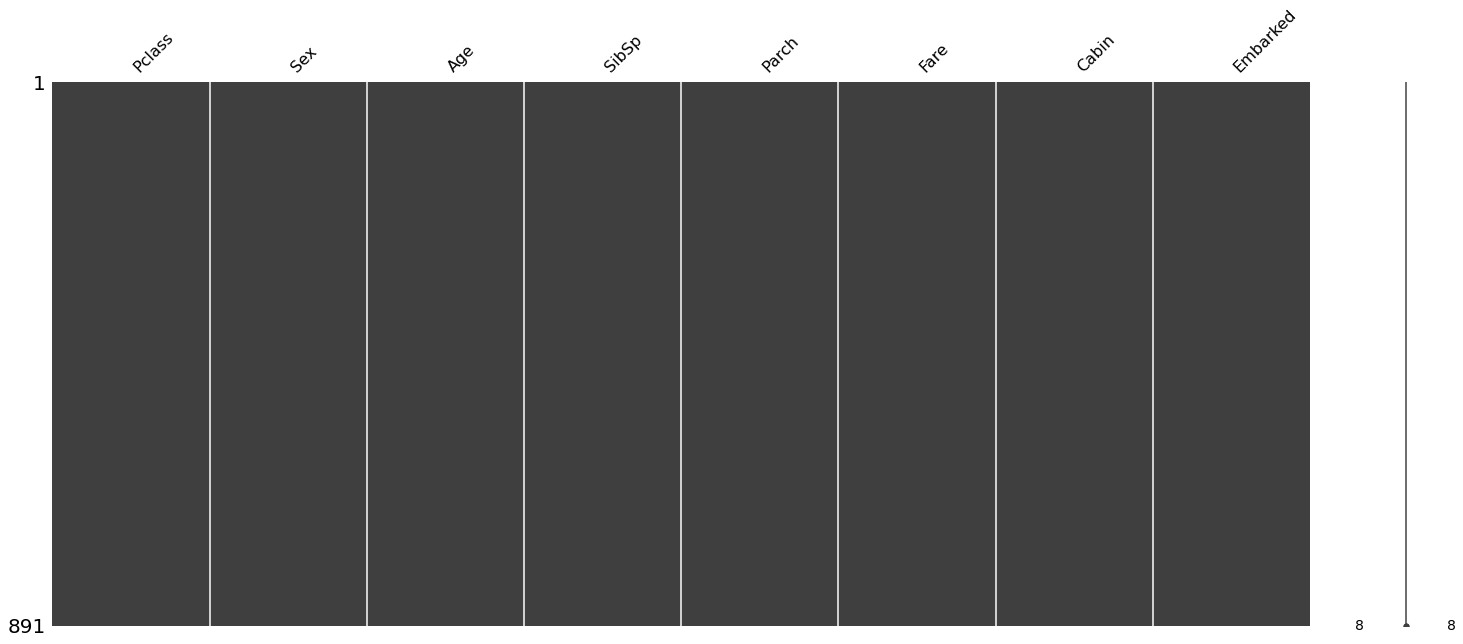

In [63]:
msno.matrix(titanic_feature)

In [64]:
print('학습고 테스트 분리 - ')
print()
X_train, X_test, y_train, y_test=train_test_split(titanic_feature,
                                                 titanic_target,
                                                 test_size=0.2,
                                                 random_state=100)

학습고 테스트 분리 - 



In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [66]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

NameError: name 'LogisticRegression' is not defined

In [67]:
lr_model = DecisionTreeClassifier()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [68]:
def metrics_eval(target, prediction) :
    print('accurancy -', accuracy_score(target, prediction))
    print('recall - ', recall_score(target, prediction))
    print('precision - ', precision_score(target,prediction))
    print('fr_score - ', f1_score(target, prediction))
    print()
    print('confusion_matrix - \n', confusion_matrix(target,prediction))

In [69]:
print('LogisticRegression')
print()
metrics_eval(y_test, lr_y_pred)

LogisticRegression

accurancy - 0.7821229050279329
recall -  0.76
precision -  0.7307692307692307
fr_score -  0.7450980392156863

confusion_matrix - 
 [[83 21]
 [18 57]]


In [71]:
print('LogisticRegression')
print()
metrics_eval(y_test, dt_y_pred)

LogisticRegression



NameError: name 'dt_y_pred' is not defined

In [ ]:
print('교차검증 -') #0과 1 만 있는 이진분류에서만 사용 가능
fold = KFold(n_splits = 20)
scoring = {
    'accuracy' : make_scorer(accyracy_score),
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1' : make_scorer(f1_score)
}

result = cross_validate(lr_model,)


In [73]:
print('유방암 관련 데이터 - 정확도, 재현율(실제 P를 N으로 예측하면 안되기 때문에)')
print('재현율은 실제 양성을 양성으로 예측한 비율이 높아야 성능이 좋은 모델')

유방암 관련 데이터 - 정확도, 재현율(실제 P를 N으로 예측하면 안되기 때문에)
재현율은 실제 양성을 양성으로 예측한 비율이 높아야 성능이 좋은 모델


In [ ]:
cancer = load_breast_cancer()

In [74]:
print("1. 프레임 만들기(feature, target) 포함")
print("2. target에 대한 규형 여부를 확인")
print("3. 데이터 세트 분리")
print("4. RandomForestClassifier")
print("5. 평가지표 확인")

cancer = load_breast_cancer()

1. 프레임 만들기(feature, target) 포함
2. target에 대한 규형 여부를 확인
3. 데이터 세트 분리
4. RandomForestClassifier
5. 평가지표 확인


In [90]:
print('데이터의 규형 여부 확인')


type(cancer)

cancer_frm = pd.DataFrame(data=cancer.data,
                         columns=cancer.feature_names)

# cancer_frm.head()
cancer_frm['target'] = cancer.target
cancer_frm['target'].value_counts()

데이터의 규형 여부 확인


1    357
0    212
Name: target, dtype: int64

In [95]:
cancer_target    =  cancer_frm['target']
cancer_features =  cancer_frm.drop(['target'] , axis = 1)

print('target type - ' , type(cancer_target) , 'features type - ' , type(cancer_features))

target type -  <class 'pandas.core.series.Series'> features type -  <class 'pandas.core.frame.DataFrame'>


In [96]:
X_train , X_test , y_train , y_test = train_test_split(cancer_features , 
                                                       cancer_target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

In [97]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
rf_y_pred = rf_model.predict(X_test)

In [99]:
metrics_eval(y_test , rf_y_pred)

accurancy - 0.9649122807017544
recall -  0.9846153846153847
precision -  0.9552238805970149
fr_score -  0.9696969696969696

confusion_matrix - 
 [[46  3]
 [ 1 64]]


In [100]:
print('교차검증 - ')
fold = KFold(n_splits=20)
scoring = {
    'accuracy'  : make_scorer(accuracy_score),
    'precision' : make_scorer(precision_score), 
    'recall'    : make_scorer(recall_score), 
    'f1' : make_scorer(f1_score), 
}

result = cross_validate(rf_model, X_train, y_train, 
                        cv = fold,
                        scoring = scoring)
result.keys()

교차검증 - 


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

In [101]:
result['test_recall'].mean()

0.9791666666666667

In [103]:
param = {
    'n_estimators' : [50, 100, 150, 200],
    'max_features' : [6, 8, 15, 20],
    'max_depth' : [4,6,8]
}

grid_search_model = GridSearchCV(rf_model,
                                param_grid = param,
                                cv = 20,
                                refit = True,
                                scoring= 'recall')
grid_search_model.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [6, 8, 15, 20],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall')

In [104]:
grid_search_model.cv_results_

{'mean_fit_time': array([0.08061336, 0.16189363, 0.22564939, 0.29217287, 0.08200376,
        0.15933901, 0.25172472, 0.34302055, 0.1085489 , 0.20471618,
        0.29923037, 0.42340258, 0.12178681, 0.23827513, 0.35932461,
        0.45468663, 0.07654793, 0.15604624, 0.23564845, 0.29928024,
        0.08124918, 0.16721659, 0.24531181, 0.32976475, 0.10545458,
        0.2192112 , 0.32597408, 0.44295861, 0.1304508 , 0.27283548,
        0.37000366, 0.49298865, 0.07884161, 0.15392039, 0.23063591,
        0.32120284, 0.08521216, 0.1843743 , 0.27180961, 0.36094172,
        0.10931227, 0.22583895, 0.34369217, 0.44141535, 0.12740477,
        0.25002537, 0.36958457, 0.49069048]),
 'std_fit_time': array([0.00703136, 0.01715837, 0.01121038, 0.01118928, 0.0068818 ,
        0.00622614, 0.01698471, 0.01595232, 0.00605107, 0.00690353,
        0.0075056 , 0.0128888 , 0.00800493, 0.01088094, 0.01907775,
        0.00841661, 0.00469143, 0.00752829, 0.00928622, 0.0075841 ,
        0.00625588, 0.00709054, 0.007

In [105]:
grid_search_model.best_params_

{'max_depth': 6, 'max_features': 8, 'n_estimators': 150}

In [106]:
grid_search_model.best_score_

0.9864285714285714

In [111]:
rf_estimator = grid_search_model.best_estimator_

In [112]:
best_y_pred = rf_estimator.predict(X_test)
metrics_eval(y_test, best_y_pred)

accurancy - 0.956140350877193
recall -  0.9846153846153847
precision -  0.9411764705882353
fr_score -  0.962406015037594

confusion_matrix - 
 [[45  4]
 [ 1 64]]


## 정밀도와 재현율을 임의로 조절하는 모델을 생성해야하는 경우
- 분류 임계값이 낮을수록 Positive를 예측할 확률이 높아져 재현율이 증가
- predict_probale()

In [113]:
matrix = [
    [-1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]
]

In [114]:
from sklearn.preprocessing import Binarizer

holder = Binarizer(threshold= 1.1) # 1.1을 기준으로 나눔
print(holder.fit_transform(matrix))


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
titanic_frm = pd.read_csv('C:/Users/JYP/data/titanic_train.csv')
titanic_frm.head()